In [2]:
import math
import pandas as pd
import numpy as np
import pandas as pd
import statistics as stats
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from random import randint
from scipy.stats import kstest
from matplotlib import pyplot as plt
from scipy.stats import t
import seaborn as sns
import math
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm 


In [3]:
df = pd.read_csv('telco.csv', sep='	')

1. The lasso regression is an alternative approach to variable selection.

(a) Explain in your own words the idea of the lasso regression. Sketch a situation
when a simple linear regression fails, but the lasso regression still can be estimated.

**** Lasso performs a so called L1 regularization (a process of introducing additional information in order to prevent overfitting), i.e. adds penalty equivalent to absolute value of the magnitude of coefficients. In particular, the minimization objective does not only include the residual sum of squares (RSS) - like in the OLS regression setting - but also the sum of the absolute value of coefficients.
Lasso will help in case we have low quantity of observations but a lot of features

**** The acronym “LASSO” stands for Least Absolute Shrinkage and Selection Operator.
Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of muticollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.
Lasso will help in case we have low quantity of observations but a lot of features.

(b) For the usual regression model the variables are rarely normalized/standardized.
However, in the case of the lasso regression the scaling becomes crucial. Why?
Scale your data by (x i − x̄)/σ̂ x . Can/should the binary variCan/should the binary variables be scaled in the
same fashion? How would you handle the variable ed?

**** Normalization is very important for methods with regularization. This is because the scale of the variables affect the how much regularization will be applies to specific variable. For example, suppose one variable is in a very large scale, say order of millions and another variable is from 0 to 1. Then, we can think the regularization will have little effect on first variable. As well as we do normalization, normalize it to 0 to 1 or standardize the features does not matter too much. 

**** The lasso method requires initial standardization of the regressors, so that the penalization scheme is fair to all regressors. For categorical regressors, one codes the regressor with dummy variables and then standardizes the dummy variables. As pointed out by a referee, however, the relative scaling between continuous and categorical variables in this scheme can be somewhat arbitrary.


Lasso regression puts constraints on the size of the coefficients associated to each variable. However, this value will depend on the magnitude of each variable. It is therefore necessary to center and reduce, or standardize, the variables.The result of centering the variables means that there is no longer an intercept. 
https://stats.stackexchange.com/questions/86434/is-standardisation-before-lasso-really-necessary
****

Categorical variable add should be coded like a Dummy

(c) Run a lasso regression for data with α ∈ (0, 1). Plot the estimated parameters
as functions of α. Which value of α would you recommend? If it is easy to
implement, then determine the optimal λ by cross-validation.

https://www.kirenz.com/post/2019-08-12-python-lasso-regression-auto/

In [42]:
df.columns

Index(['tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ',
       'retire', 'gender', 'longmon', 'wiremon', 'churn', 'longmon_ln'],
      dtype='object')

In [43]:
df.head(2)

,tenure,age,marital,address,income,ed,employ,retire,gender,longmon,wiremon,churn,longmon_ln
1,13,44,Married,9,64,College degree,5,No,Male,3.7,0.0,Yes,1.308333
2,11,33,Married,7,136,Post-undergraduate degree,5,No,Male,4.4,35.7,Yes,1.481605


In [44]:
df = pd.get_dummies(df, columns=['marital','ed', 'churn', 'retire', 'gender']).head()
df.fillna(0, inplace=True)

In [45]:
df = (df - df.mean())/df.std()
df.fillna(0, inplace = True)

In [46]:
X = df.drop(columns=['longmon', 'marital_Unmarried', 'ed_College degree','churn_No','retire_No','gender_Female'])
y = df['longmon'] 
X.head(2)


,tenure,age,address,income,employ,wiremon,longmon_ln,marital_Married,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,churn_Yes,retire_Yes,gender_Male
1,-0.715810,0.602813,-0.468265,-0.244605,-0.27074,-0.447214,-1.012890,0.447214,-0.730297,-0.447214,-0.447214,0.0,0.730297,0.0,0.730297
2,-0.802052,-0.581284,-0.760930,1.247900,-0.27074,1.788854,-0.741505,0.447214,-0.730297,-0.447214,1.788854,0.0,0.730297,0.0,0.730297


In [10]:
# lasso = Lasso()
# lasso.fit(X_train,y_train)
# train_score=lasso.score(X_train,y_train)
# test_score=lasso.score(X_test,y_test)
# coeff_used = np.sum(lasso.coef_!=0)

In [47]:
reg = Lasso(alpha=0.5)
reg.fit(X, y)


Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9


/home/ky/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/home/ky/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


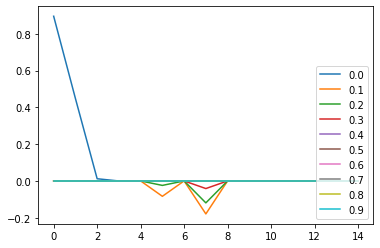

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
plt.clf()
result = pd.DataFrame()

for i in np.arange(0.0, 1.0, 0.1):
    print(i)
    reg = Lasso(alpha=i)
    reg.fit(X_train, y_train)
    plt.plot(reg.coef_, label=round(i, 1))
    
plt.legend(loc="lower right")
    
plt.show()

As we see the most coefficients different from zero is at Alpha abt. 0.6. It seems the most optimal

/home/ky/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


CV [ 0.23708535  0.          0.25192354  0.          0.06399666  0.
  0.41271757 -0.          0.          0.          0.          0.
 -0.          0.         -0.        ]


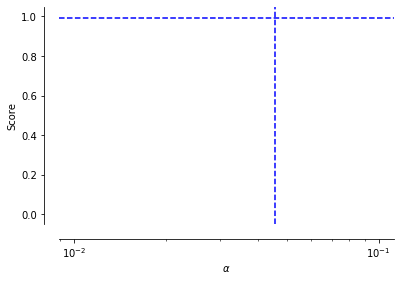

In [49]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
plt.clf()
alphas = np.logspace(0, 1, 0.1)
scores = np.empty_like(alphas)
for i,a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_test, y_test)
    print(a, lasso.coef_)
    
lassocv = linear_model.LassoCV()
lassocv.fit(X, y)
lassocv_score = lassocv.score(X, y)
lassocv_alpha = lassocv.alpha_
print('CV', lassocv.coef_)

plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score, color='b', ls='--')
plt.axvline(lassocv_alpha, color='b', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')
plt.xscale('log')
sns.despine(offset=15)

In [50]:
lassocv_alpha

0.04561843263884558

2. A nonlinear regression offers a flexible technique for modelling complex relationships.
We wish to explain the tenure by the long distance calls per month longmon.
(a) Make a bivariate scatter plot and estimate an appropriate linear (!) model. Add
the regression line to the plot.

In [51]:
df = pd.read_csv('telco.csv', sep='	')

<Figure size 432x288 with 0 Axes>

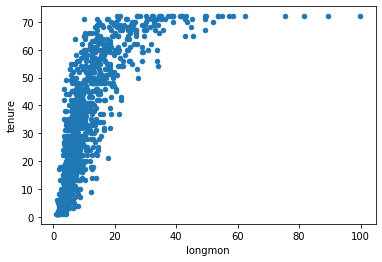

In [52]:
plt.clf()
df.plot(x='longmon', y='tenure', kind='scatter')
plt.show()

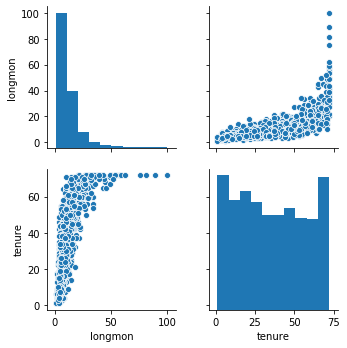

In [28]:
sns.pairplot(df[['longmon', 'tenure']])

Grahp see more like logarithm function, so appropriate linear model will be y = b0 + b1 * ln(xi) + ui

In [31]:
# df['longmon_exp'] = df['longmon'].apply(lambda x: 0 if x ==0 else math.exp(x))
# df['longmon_sq'] = df['longmon'].apply(lambda x: 0 if x ==0 else (x**(2)))

/home/ky/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


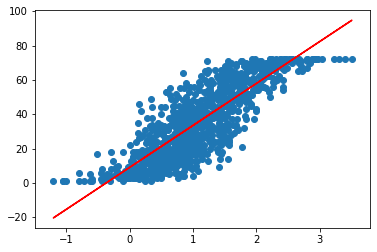

In [89]:
df['longmon_ln'] = df['longmon'].apply(lambda x: 0 if x ==0 else math.log(x**1/3))
X = df['longmon_ln'].astype(float)
Y = df['tenure']
model = sm.OLS(Y, sm.add_constant(X))
results = model.fit()
# results.params
intercept, slope  = results.params
line = slope*X+intercept
plt.clf()
plt.plot(X, line, 'r', )
plt.scatter(X, Y)
plt.show()

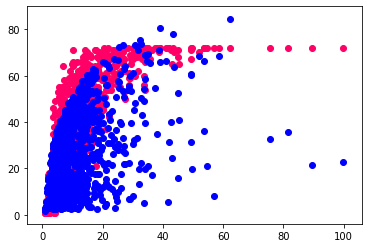

[2.15311817]


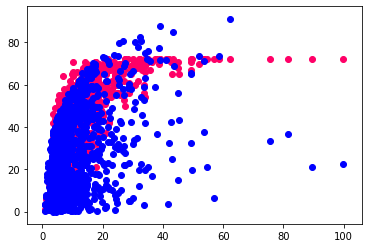

In [86]:
import numpy as np
import scipy.optimize as optimize
import matplotlib.pylab as plt

def func(power,b0,b1):
    return (b0  + b1 * np.log(x**power))

def residuals(power,b0,b1,PLP):
    return y - func(power,b0,b1)

N=1000
x = pd.to_numeric(df['longmon'], errors='raise', downcast='float')
y = pd.to_numeric(df['tenure'], errors='raise', downcast='float')
power_guess=0.5  # <-- You have to supply a guess for power
b0 = np.linspace(0,10,N)
b1 = np.linspace(0,10,N)

y = pd.to_numeric(df['tenure'], errors='raise', downcast='float')

power,cov,infodict,mesg,ier = optimize.leastsq(
    residuals,power_guess,args=(b0,b1,y),full_output=True)

y_fit=func(power,b0,b1)

print(power)

# plt.plot(x,y,'-b',x,y_fit,'-r')

plt.scatter(x, y, color="#FF0067")
plt.scatter(x, y_fit, color="#0000FF")
plt.show()

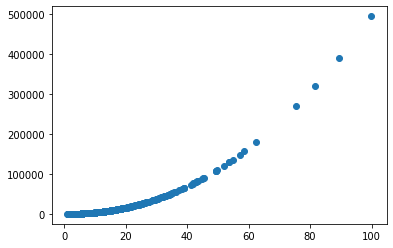

In [97]:
x_power = x**power
model_nls = sm.OLS(y, sm.add_constant(x_power))
results_nls = model.fit()
# results_nlsparams
intercept_nls, slope_nls  = results_nls.params
line_nls = slope_nls*x**power+intercept_nls
plt.clf()
plt.scatter(x, line_nls)
# plt.scatter(x, y)
plt.show()

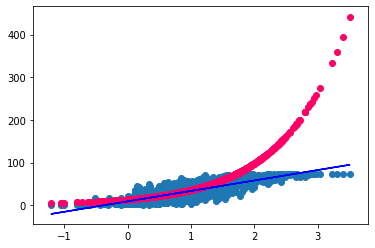

In [112]:
plt.clf()
plt.plot(X, line, 'b', )
plt.scatter(X, Y)
plt.scatter(X, (line_nls**(1/power)), color="#FF0067")
plt.show()